<a href="https://colab.research.google.com/github/MohammadSarim/Capstone-Project-1-Play-Store-App-Review-Analysis/blob/main/Capstone_Project_EDA_(PlayStore_App_Review_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Play Store is the largest and most popular Android app store and the Play Store apps data has ability to drive succesful business of app making.

###**The purpose of our project:**

* ### To Analyze the Play Store apps data in the Google Play Store in order to provide insights about Play Store applications and their categories.

* ### To Analyze the state of the Android app market.



* ### To know the factors required for an application to succeed on the top of the charts by deep dive into data.



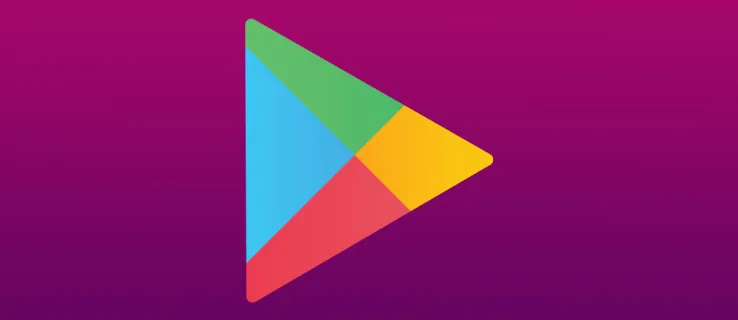

##**Dataset details**:

The Google Play Store dataset contains information about the various Android apps that are available for download on the platform.This information typically includes two files as 'Play Store Data.csv' and the other is 'User Reviews.csv'.


* **user_reviews.csv:** contains more than 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: 

1) Sentiment (Positive, Negative or Neutral)

2) Sentiment Polarity
 
3) Sentiment Subjectivity.

* **playstore data.csv:** contains all the details of the applications on Google Play. 

There are 13 features that describe a given app.

1) App

2) Category (e.g. games, education, tools, etc.)

3) Rating(star ratings given by users)

4) Reviews

5) Size

6) Installs

7) Type (Free/Paid)

8) Price

9) Content Rating (Everyone/Teenager/Adult)

10) Genres (Detailed Category)

11) Last Updated

12) Current Version

13) Android Version

##**Problem Statements:**##
1. What are the top five earning Category?
2. Top 5 earnings Apps
3. Total number of paid and free apps on playstore and it's ratio?
4. Total Number of user using free and paid Apps
5. Maximum rating of apps in each genres.
6. Highest downloads according to month.
7. Top categories on playstore
8. Which category of Apps from the Content Rating column are found more on playstore ?
9. Top 5 best average rating category on playstore
10. Size distribution of apps in playstore
11. Review counts over the time
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps?
14. How Content Rating affect over the App?
15. Does Last Update date has an effects on rating?
16. Distribution of App update over the Year.
17. Distribution of Paid and Free app updated over the Month.

# **Exploratory Data Analysis (EDA)**:

Exploratory Data Analysis (EDA) is an approach to analyzing and understanding a dataset. It is an iterative process that involves summarizing, visualizing, and transforming the data to identify patterns, relationships, and insights. The goal of EDA is to gain a deeper understanding of the data, identify any potential issues or limitations, and prepare the data for further analysis. EDA is an important step in the data analysis process as it provides a comprehensive overview of the data and helps in forming hypothesis and understanding the relationships between variables.

The steps involved in an Exploratory Data Analysis (EDA) process are:

**Data collection**: Collect and gather all relevant data for analysis.

**Data cleaning**: Handle missing values, remove duplicates and handle outliers.

**Univariate Analysis**: Analyze each variable individually to understand its distribution, range, central tendency, and outliers.

**Bivariate Analysis**: Analyze the relationship between two variables and identify the relationship between them.

**Multivariate Analysis**: Analyze more than two variables together to identify complex relationships between variables.

**Data Visualization**: Use various visualizations such as histograms, box plots, scatter plots, etc. to represent the data and gain insights.

**Feature Engineering**: Transform and create new variables to improve the quality of the data.

**Report Writing**: Summarize the insights and findings from the analysis and communicate it effectively to the stakeholders.

# **Exploring Play Store Data:**

In [1]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")
import missingno as msno

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the csv file 
file_path = '/content/drive/My Drive/dataset/Play Store Data.csv'
Play_Store_DataFrame = pd.read_csv(file_path)

In [4]:
#Checking the details of play store dataframe.
Play_Store_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#Checking dataset columns name
Play_Store_DataFrame.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
#Starting rows of play store dataframe.
Play_Store_DataFrame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#Last few rows of the playstore dataframe.
Play_Store_DataFrame.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
concat_data = pd.concat([Play_Store_DataFrame.head(),Play_Store_DataFrame.tail()],axis=0,ignore_index=True)
concat_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
Play_Store_DataFrame.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Cleaning of the Data:**

**Handling Missing Values**: Identify missing values in the dataset and decide on an imputation strategy, such as mean imputation, median imputation, or the use of machine learning algorithms to predict missing values.

**Removing Duplicates**: Identify and remove duplicate records from the dataset.

**Handling Outliers**: Identify and handle outliers by removing them or transforming them to bring them in line with the rest of the data.

**Correcting Data Types**: Ensure that the data types of variables are correct and consistent across all records.

**Checking for Inconsistencies**: Ensure that the data is consistent and in the right format, such as dates in the correct format, etc.

**Feature Engineering**: Transform and create new variables to improve the quality of the data.

**Standardizing Data**: Ensure that the data is in a standard format by scaling or normalizing the data to a common scale.

**Removing Irrelevant Data**: Remove data that is not relevant or necessary for the analysis.


## **Visualizing the null values and non null values of each column in play store dataset**

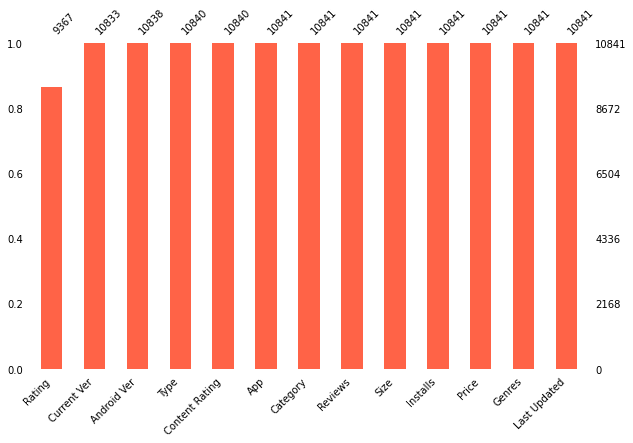

In [10]:
msno.bar(Play_Store_DataFrame,color="tomato", sort="ascending",figsize = (10,6),fontsize = 10)

## **Cheking the count of unique values, null values and non null values in the play store dataset.**

In [11]:
def playstore_details():
  playstore_content = pd.DataFrame(index=Play_Store_DataFrame.columns)
  playstore_content['Data Type'] = Play_Store_DataFrame.dtypes
  playstore_content['Not Null Values']=Play_Store_DataFrame.count()
  playstore_content['Number of Null Values'] = Play_Store_DataFrame.isnull().sum()
  playstore_content['Unique Values'] = Play_Store_DataFrame.nunique()
  return playstore_content 

In [12]:
playstore_details()

,Data Type,Not Null Values,Number of Null Values,Unique Values
App,object,10841,0,9660
Category,object,10841,0,34
Rating,float64,9367,1474,40
Reviews,object,10841,0,6002
Size,object,10841,0,462
Installs,object,10841,0,22
Type,object,10840,1,3
Price,object,10841,0,93
Content Rating,object,10840,1,6
Genres,object,10841,0,120


Rating has 1474 null values which contributes 13.60% of the data.
Type has 1 null value which contributes 0.01% of the data.
Content_Rating has 1 null value which contributes 0.01% of the data.
Current_Ver has 8 null values which contributes 0.07% of the data.
Android_Ver has 3 null values which contributes 0.03% of the data.




# Handling NaN for the "Type" column

In [13]:
Play_Store_DataFrame[Play_Store_DataFrame.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since there is only one missing value in this column, So, let's fill the missing value. After cross-checking the above row the missing value is found to be Free since the price in the above row is 0, so now we can fill the missing value with Free.



In [14]:
Play_Store_DataFrame.loc[9148,'Type']='Free'

After filling the value we can check and see if that has been correctly placed.

In [15]:
Play_Store_DataFrame.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Handling NaN for "Content Rating" column

In [16]:
Play_Store_DataFrame[Play_Store_DataFrame['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Let us have a look at all of its near rows data.

In [17]:
Play_Store_DataFrame.loc[10465:10480,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We can clearly see that row 10472 has missing data for the category column. So, a better idea will be to drop this row.

In [18]:
Play_Store_DataFrame.drop(10472,inplace = True)

In [19]:
Play_Store_DataFrame.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# Handling NaN for the column "Rating"

In [20]:
Play_Store_DataFrame[(Play_Store_DataFrame['Rating'] <1) | (Play_Store_DataFrame['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


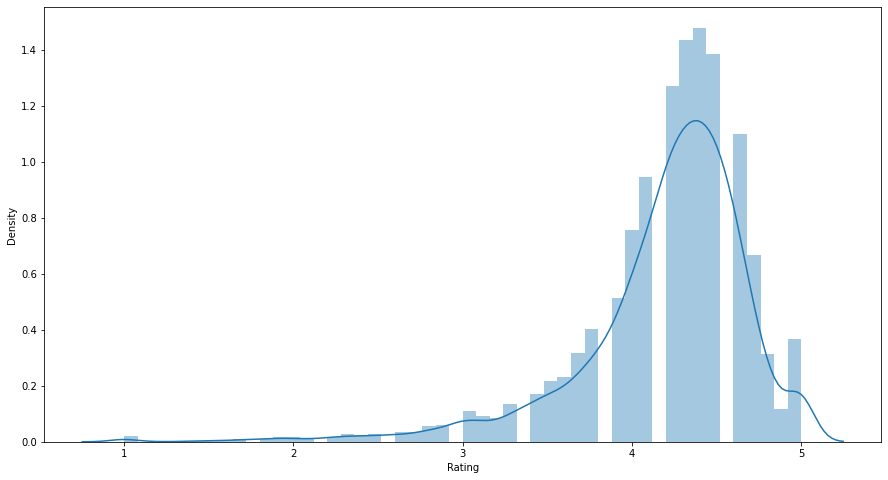

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(Play_Store_DataFrame.Rating)


1. If a variable is normally distributed, the mean, median, and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for numerical variables.

2. If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [22]:
Median_Rating = Play_Store_DataFrame[~Play_Store_DataFrame['Rating'].isnull()]['Rating'].median()

In [23]:
Play_Store_DataFrame['Rating'].fillna(value=Median_Rating,inplace=True)
Play_Store_DataFrame.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

# Handling NaN in "Android ver"

In [24]:
Play_Store_DataFrame[Play_Store_DataFrame["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [25]:
Play_Store_DataFrame["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since, there are only two rows having NaN values in 'Android ver', we can drop the columns from the dataset.

In [26]:
Play_Store_DataFrame=Play_Store_DataFrame[Play_Store_DataFrame['Android Ver'].notna()]
Play_Store_DataFrame.shape

(10838, 13)

# Handling NaN for "Current ver"

In [27]:
Play_Store_DataFrame[Play_Store_DataFrame["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [28]:
Play_Store_DataFrame["Current Ver"].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

Since, there are only two rows having NaN values in 'Current ver', we can drop the columns from the dataset.

In [29]:
Play_Store_DataFrame=Play_Store_DataFrame[Play_Store_DataFrame['Current Ver'].notna()]
Play_Store_DataFrame.shape

(10830, 13)

# Handling Duplicate values in the data set.

In [30]:
Play_Store_DataFrame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
Play_Store_DataFrame['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [32]:
Play_Store_DataFrame.drop_duplicates(subset = 'App', inplace = True)
Play_Store_DataFrame.shape

(9649, 13)

In [33]:
Play_Store_DataFrame['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

In [34]:
Play_Store_DataFrame.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Correcting Data Types:**

In [35]:
Play_Store_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


##**Converting the data type of Reviews columns from object to numeric.**

In [36]:
Play_Store_DataFrame['Reviews'] = Play_Store_DataFrame['Reviews'].astype(int)

In [37]:
Play_Store_DataFrame['Reviews'].dtype

dtype('int64')

In [38]:
def data_converter(val):
  try:
    if val == 'Varies with device':
      return np.nan
    elif 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [39]:
Play_Store_DataFrame['Size'] = Play_Store_DataFrame['Size'].apply(lambda x: data_converter(x))
Play_Store_DataFrame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [40]:
Play_Store_DataFrame['Size'].value_counts()

12.0000    181
11.0000    181
13.0000    177
14.0000    176
15.0000    163
          ... 
0.7041       1
0.4199       1
0.4189       1
0.1953       1
0.6045       1
Name: Size, Length: 455, dtype: int64

In [41]:
Play_Store_DataFrame['Size'].isnull().sum()

1227

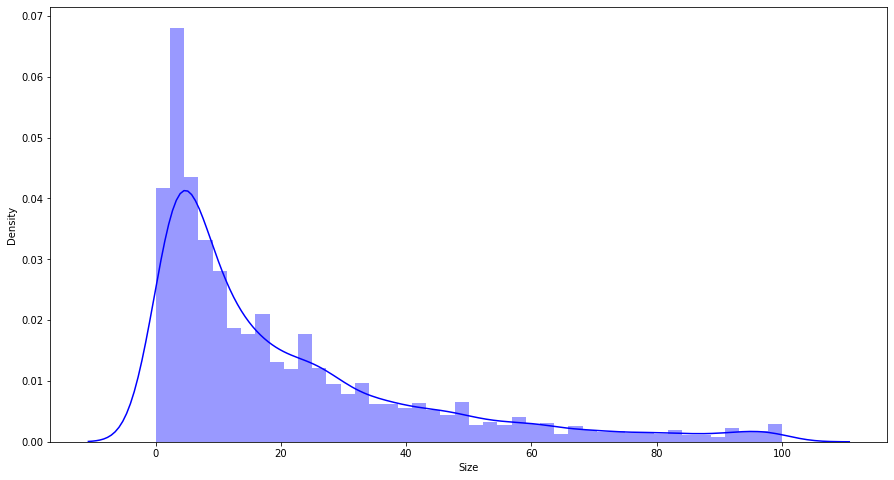

In [42]:
plt.figure(figsize=(15,8))
sns.distplot(Play_Store_DataFrame.Size,color = 'blue')

Since we converted the "Varies with device" value to NaN , so we have to do something with those set of NaN values data. It will be a better idea to drop the Rows of the column Size having NaN values because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

In [43]:
Play_Store_DataFrame.dropna(subset = ['Size'], inplace=True)

In [44]:
Play_Store_DataFrame['Size'].isnull().sum()

0

## **Converting "Installs" column data type form string into float type**

In [45]:
Play_Store_DataFrame['Installs'].head(5)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [46]:
def RemoveSignsfromInstall(str1):
  if '+' and ',' in str1:
    numeric_value = (int(str1[:-1].replace(',','')))
    return numeric_value
  elif "+" in str1:
    numeric_value1 = (int(str1[:-1]))
    return numeric_value1
  else:
    return int(str1)  

In [47]:
Play_Store_DataFrame['Installs'] = Play_Store_DataFrame['Installs'].apply(lambda x: RemoveSignsfromInstall(x))

In [48]:
Play_Store_DataFrame['Installs'].head(5)

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

## **Converting the "Price" column datatype from string into numeric.**

In [49]:
Play_Store_DataFrame['Price'].value_counts()

0          7740
$0.99       140
$2.99       110
$1.99        66
$4.99        63
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [50]:
def PriceConverter(str1):
  if "$" in str1:
    return float(str1[1:])
  else:
    return float(str1)  

In [51]:
Play_Store_DataFrame['Price'] = Play_Store_DataFrame['Price'].apply(lambda x: PriceConverter(x))

In [52]:
Play_Store_DataFrame.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [53]:
Play_Store_DataFrame['Price'].value_counts()

0.00      7740
0.99       140
2.99       110
1.99        66
4.99        63
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: Price, Length: 87, dtype: int64

## **Converting the "Last Updated" column from object to date format.**

In [54]:
Play_Store_DataFrame["Last Updated"] = pd.to_datetime(Play_Store_DataFrame['Last Updated'], infer_datetime_format=True)
Play_Store_DataFrame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [55]:
Play_Store_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8422 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8422 non-null   object        
 1   Category        8422 non-null   object        
 2   Rating          8422 non-null   float64       
 3   Reviews         8422 non-null   int64         
 4   Size            8422 non-null   float64       
 5   Installs        8422 non-null   int64         
 6   Type            8422 non-null   object        
 7   Price           8422 non-null   float64       
 8   Content Rating  8422 non-null   object        
 9   Genres          8422 non-null   object        
 10  Last Updated    8422 non-null   datetime64[ns]
 11  Current Ver     8422 non-null   object        
 12  Android Ver     8422 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 921.2+ KB


# **Checking the correlation between the columns in play store dataset.**

In [56]:
Play_Store_DataFrame.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.061308,0.045528,0.040479,-0.018734
Reviews,0.061308,1.000000,0.179275,0.597281,-0.008656
Size,0.045528,0.179275,1.000000,0.134216,-0.022494
Installs,0.040479,0.597281,0.134216,1.000000,-0.010156
Price,-0.018734,-0.008656,-0.022494,-0.010156,1.000000


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

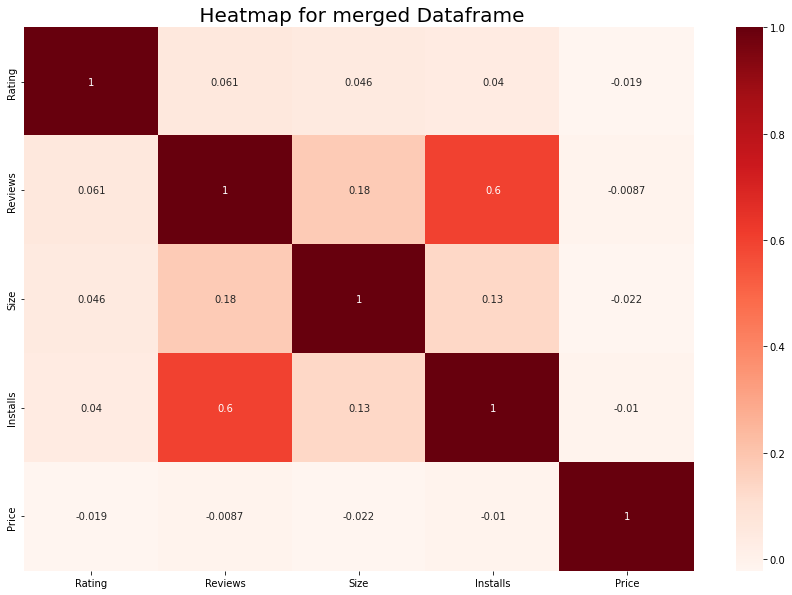

In [57]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(Play_Store_DataFrame.corr(), annot= True, cmap='Reds')
plt.title(' Heatmap for merged Dataframe', size=20)

# **1-) What are the top five earning Category?**




In [58]:
Paid_Genres = Play_Store_DataFrame[Play_Store_DataFrame['Type']=='Paid']

In [59]:
Paid_Genres['Total_Earnings'] = Paid_Genres['Price']*Paid_Genres['Installs']

In [60]:
Paid_Genres.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total_Earnings
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8000,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,499000.0
477,Calculator,DATING,2.6,57,6.2000,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,6990.0
478,Truth or Dare Pro,DATING,4.3,0,20.0000,50,Paid,1.49,Teen,Dating,2017-09-01,1.0,4.0 and up,74.5
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.3,0,0.0176,100,Paid,2.99,Everyone,Dating,2017-07-25,1.0.1,4.0 and up,299.0


In [61]:
Top_5 = Paid_Genres.groupby('Category',as_index=False).agg({'Total_Earnings':"sum"}).sort_values('Total_Earnings',ascending = False)
Top_5.head()

,Category,Total_Earnings
15,LIFESTYLE,57554049.40
9,FAMILY,41872015.86
12,GAME,40090634.87
10,FINANCE,25726678.98
21,PHOTOGRAPHY,8053267.70


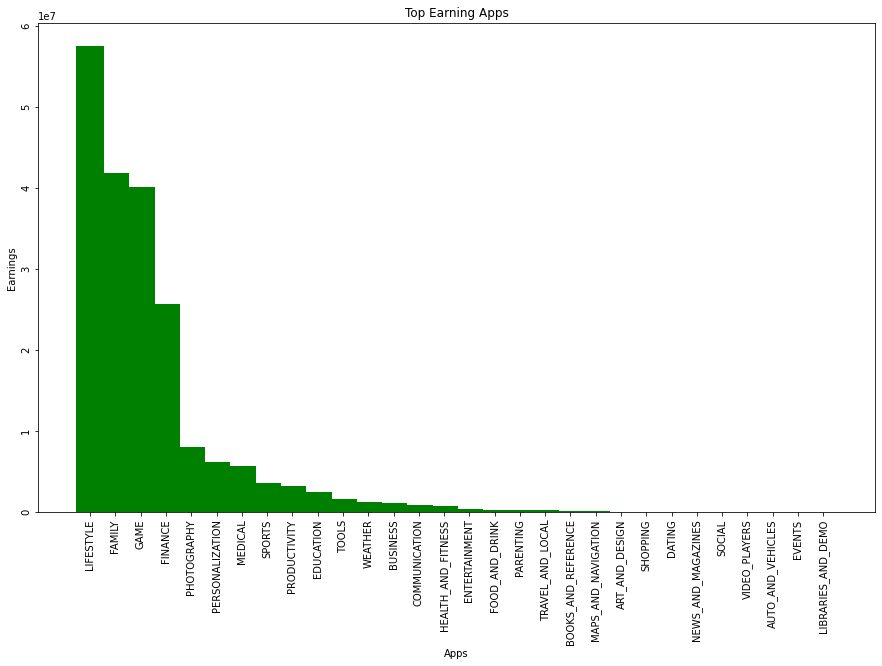

In [62]:
plt.figure(figsize=(15,9))
plt.bar(Top_5.Category, Top_5.Total_Earnings, width=1.1, color = 'green', label=Top_5.Total_Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

# **2-) Top 5 earnings Apps**

In [63]:
DataFrame_sorted_by_Earnings = Paid_Genres.sort_values(by='Total_Earnings', ascending=False).head(50)

In [64]:
DataFrame_sorted_by_Price = DataFrame_sorted_by_Earnings.sort_values(by='Price', ascending=False)

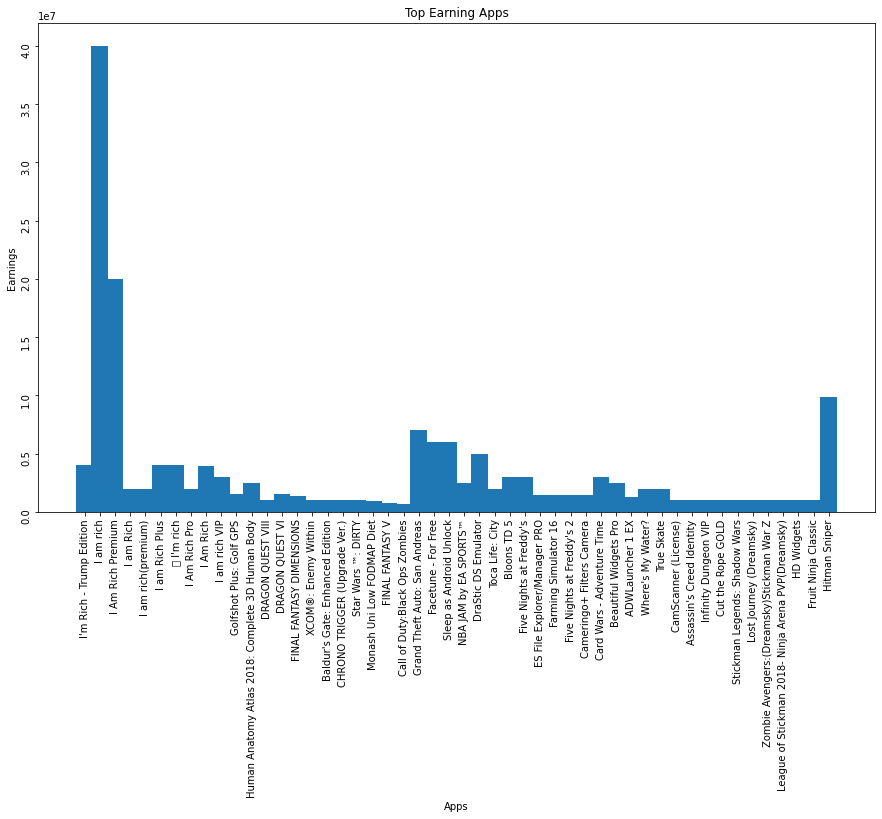

In [65]:
plt.figure(figsize=(15,9))
plt.bar(DataFrame_sorted_by_Price.App, DataFrame_sorted_by_Price.Total_Earnings, width=1.1, label=DataFrame_sorted_by_Price.Total_Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

In [66]:
Paid_Genres[["App","Total_Earnings"]].sort_values('Total_Earnings',ascending = False).head(5)

,App,Total_Earnings
5351,I am rich,39999000.0
5356,I Am Rich Premium,19999500.0
4034,Hitman Sniper,9900000.0
7417,Grand Theft Auto: San Andreas,6990000.0
5578,Sleep as Android Unlock,5990000.0


# **3-) Total number of paid and free apps on playstore and it's ratio?**

In [67]:
Ratio_df = Play_Store_DataFrame['Type'].value_counts()
Ratio_df

Free    7740
Paid     682
Name: Type, dtype: int64

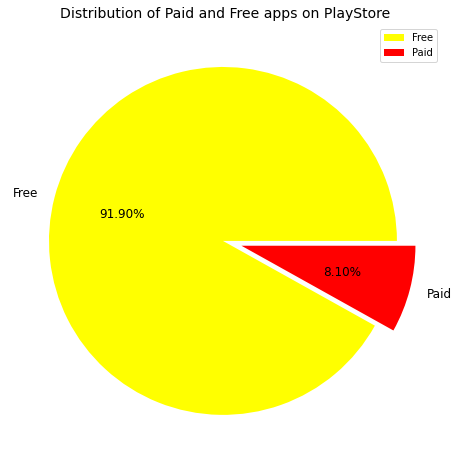

In [68]:
labels = ['Free', 'Paid']

plt.figure(figsize=(8,8))
explode=(0.01,0.1)
colors = ['yellow','red']
plt.pie(Ratio_df, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 12})
plt.title('Distribution of Paid and Free apps on PlayStore',size=14,loc='center')
plt.legend()

# **4-) Total Number of user using free and paid Apps**

In [69]:
Total_Users_Acc_to_Type = Play_Store_DataFrame.groupby('Type').agg({'Installs': 'sum'}).reset_index()

In [70]:
Total_Users_Acc_to_Type.head()

,Type,Installs
0,Free,31358701885
1,Paid,42278509


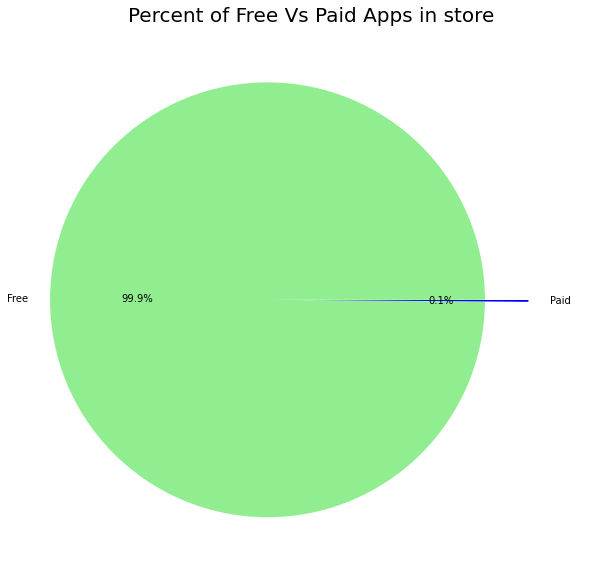

In [71]:
plt.figure(figsize=(10,10))
colors = ["lightgreen","blue"]
explode = (0.2,0)
plt.pie(Total_Users_Acc_to_Type['Installs'], explode=explode, labels=Total_Users_Acc_to_Type["Type"], colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

# **5-) Maximum rating of apps in each genres.**

In [72]:
Highest_Rated_app_IG = Play_Store_DataFrame.groupby('Category',as_index=False).apply(lambda x:x.loc[x["Rating"].idxmax()])

In [73]:
Highest_Rated_app_IG.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9,100,Free,0.0,Everyone,Art & Design,2018-04-18,1.0.2,4.0 and up
1,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33.0,100000,Free,0.0,Everyone,Auto & Vehicles,2018-07-18,1.7.1,4.0 and up
2,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14.0,1000000,Free,0.0,Everyone,Beauty,2017-11-09,2.3.0,4.1 and up
3,R Programing Offline Tutorial,BOOKS_AND_REFERENCE,5.0,4,3.9,1000,Free,0.0,Everyone,Books & Reference,2018-03-15,1.0.0,4.1 and up
4,Ag Valley Cooperative,BUSINESS,5.0,6,74.0,500,Free,0.0,Everyone,Business,2017-06-26,2.3,4.0 and up


In [74]:
Highest_Rated_app_IG[Highest_Rated_app_IG['Type']=='Paid'].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
11,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.0,10,Paid,4.99,Everyone,Education,2018-04-04,1.0.59,2.3 and up
20,Super Hearing Secret Voices Recorder PRO,MEDICAL,5.0,3,23.0,100,Paid,2.99,Everyone,Medical,2018-04-20,1.0,4.1 and up
23,P-Home for KLWP,PERSONALIZATION,5.0,4,12.0,100,Paid,0.99,Everyone,Personalization,2018-05-15,v2018.May.15.14,5.0 and up
29,ADS-B Driver,TOOLS,5.0,2,6.3,100,Paid,1.99,Everyone,Tools,2018-05-15,1.19,4.4 and up


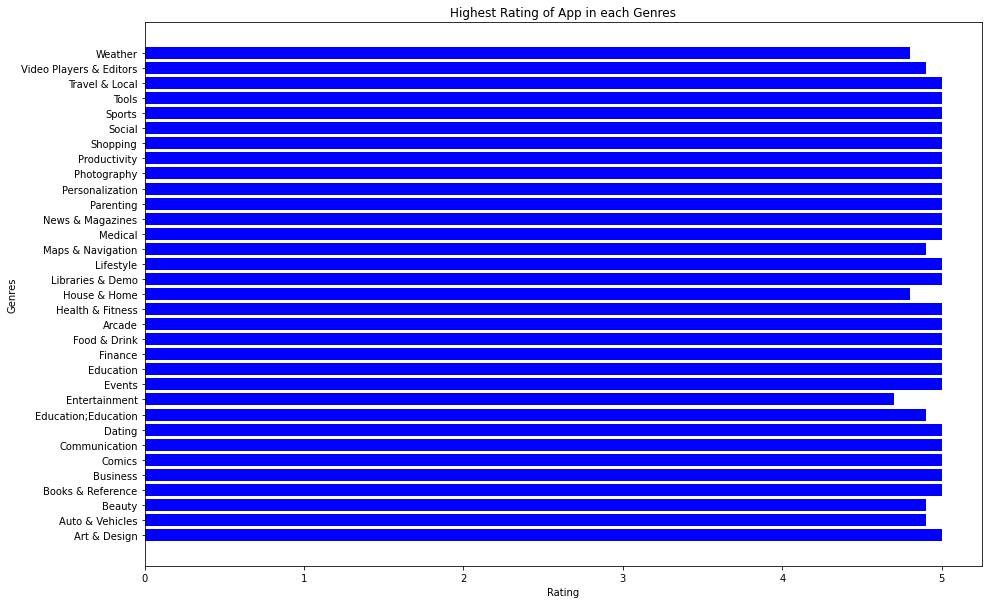

In [75]:
plt.figure(figsize=(15,10))
plt.barh(Highest_Rated_app_IG["Genres"], Highest_Rated_app_IG["Rating"], color="blue")
plt.xlabel("Rating")
plt.ylabel("Genres")
plt.title("Highest Rating of App in each Genres")
plt.yticks(Highest_Rated_app_IG["Genres"])
plt.show()

# **6-) Highest downloads according to month.**

In [76]:
Play_Store_DataFrame['Month'] = Play_Store_DataFrame['Last Updated'].apply(lambda x: x.strftime('%B'))

In [77]:
Play_Store_DataFrame.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,June


In [78]:
Highest_Installation_df = Play_Store_DataFrame.groupby("Month")["Installs"].sum().reset_index()
Highest_Installation_df

,Month,Installs
0,April,1052737619
1,August,7640130698
2,December,617596147
3,February,500989300
4,January,724607661
5,July,12850226027
6,June,3411137724
7,March,670799715
8,May,2513615607
9,November,707161197


In [79]:
Highest_Installation_df.sort_values('Installs',ascending = False).head(1)

,Month,Installs
5,July,12850226027


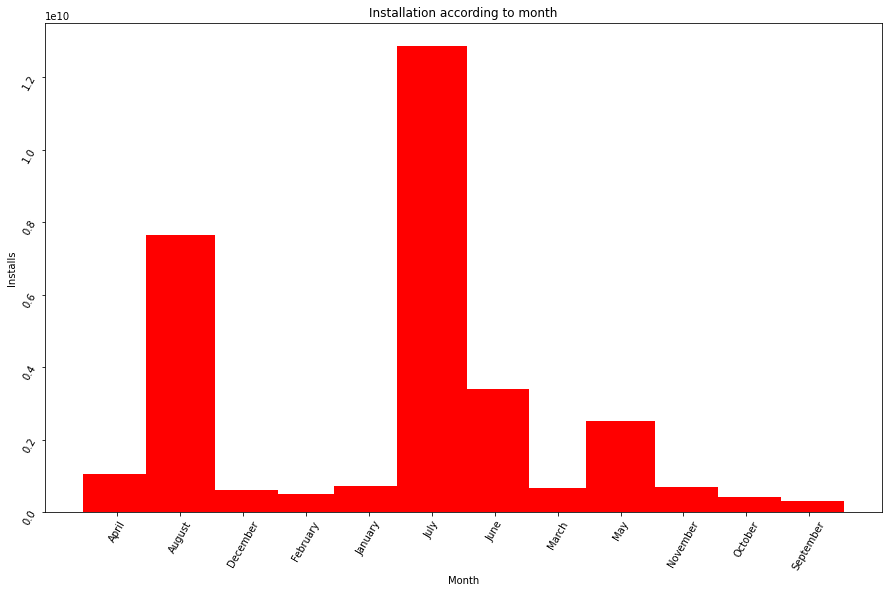

In [80]:
plt.figure(figsize=(15,9))
plt.bar(Highest_Installation_df.Month, Highest_Installation_df.Installs,color = 'red' ,width=1.1, label=Highest_Installation_df.Month)
plt.xlabel("Month")
plt.ylabel("Installs")
plt.tick_params(rotation=60)
plt.title("Installation according to month");

# **7-) Top categories on playstore**

In [81]:
Top_Cat = Play_Store_DataFrame['Category'].value_counts().reset_index()

In [82]:
Top_Cat.head(10)

,index,Category
0,FAMILY,1723
1,GAME,873
2,TOOLS,729
3,BUSINESS,376
4,MEDICAL,368
5,PERSONALIZATION,349
6,LIFESTYLE,334
7,FINANCE,299
8,PRODUCTIVITY,291
9,SPORTS,285


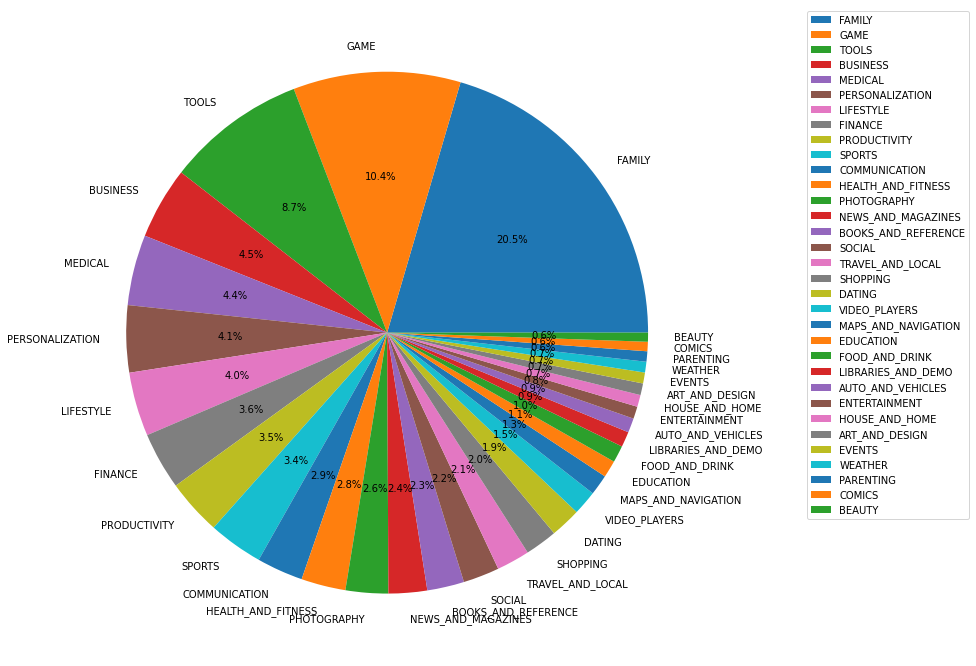

In [83]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = Top_Cat['Category'], labels= Top_Cat['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

# **8-) Which category of Apps from the Content Rating column are found more on playstore ?**

In [84]:
content_rating = Play_Store_DataFrame['Content Rating'].value_counts()
content_rating

Everyone           6907
Teen                898
Mature 17+          340
Everyone 10+        273
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

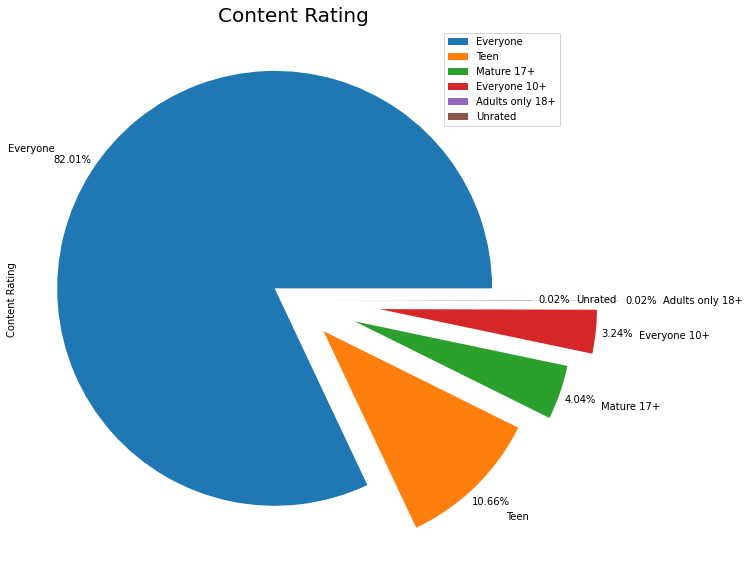

In [85]:
plt.figure(figsize=(10,10))
content_rating.plot(kind='pie', explode= (0.1,0.2,0.3,0.4,0.5,0.1), autopct='%.2f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Content Rating',size=20,loc='center')
plt.legend()

# **9-) Top 5 best average rating category on playstore**

In [86]:
Top_5_Category_Acc_Ratings = Play_Store_DataFrame.groupby('Category')['Rating'].mean().sort_values(ascending = False)

In [87]:
Top_5_Category_Acc_Ratings.head(5)

Category
EVENTS             4.419298
ART_AND_DESIGN     4.377049
EDUCATION          4.373034
PARENTING          4.338889
PERSONALIZATION    4.319198
Name: Rating, dtype: float64

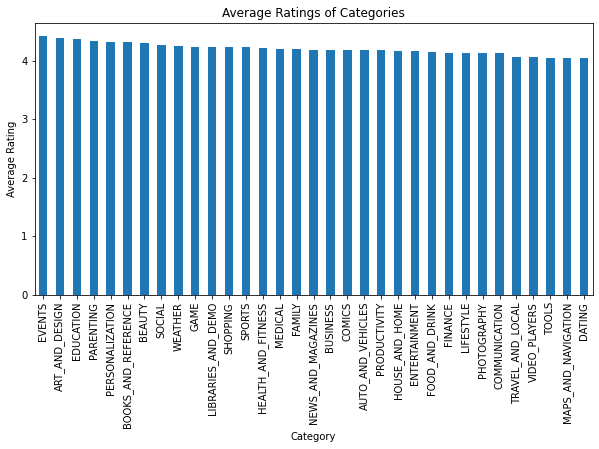

In [88]:
# Group the data by category and find the average rating for each category
category_rating = Play_Store_DataFrame.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Plot the average rating for each category
category_rating.plot(kind='bar', figsize=(10,5))
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Categories')
plt.show()

# **10-) Size distribution of apps in playstore**

In [89]:
Play_Store_DataFrame.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,June


In [90]:
Play_Store_DataFrame["Size"].max()

100.0

In [91]:
Play_Store_DataFrame["Size"].min()

0.0083

In [92]:
def size_distribution(size_of_app):
  if size_of_app>0 and size_of_app<=25:
    return '0-25'
  elif size_of_app>25 and size_of_app<=50:
    return '25-50'
  elif size_of_app>50 and size_of_app<=75:
    return '50-75'
  else:
    return '75 and above'    


In [93]:
Play_Store_DataFrame['size_interval']=Play_Store_DataFrame['Size'].apply(lambda x : size_distribution(x))

In [94]:
Play_Store_DataFrame.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,size_interval
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,January,0-25
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,0-25
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,August,0-25
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,June,0-25
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,June,0-25


In [95]:
Play_Store_DataFrame['size_interval'].value_counts()

0-25            6023
25-50           1523
50-75            536
75 and above     340
Name: size_interval, dtype: int64

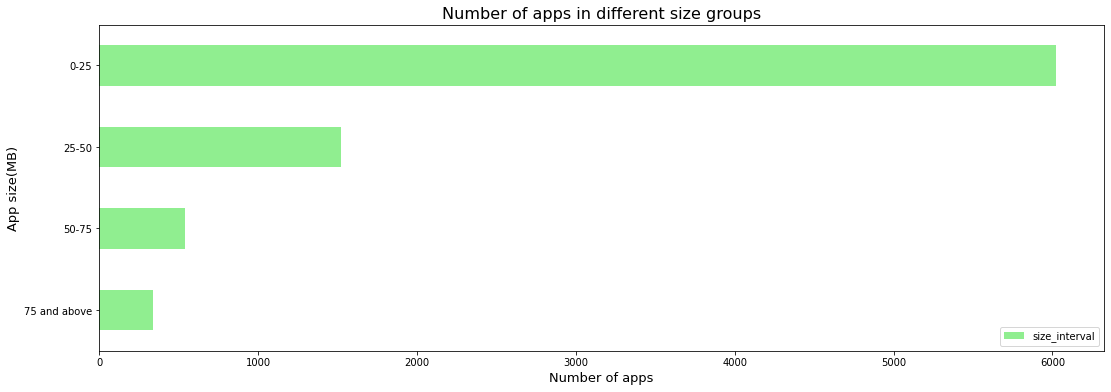

In [96]:
Play_Store_DataFrame['size_interval'].value_counts().plot.barh(figsize=(18,6),color='lightgreen').invert_yaxis()
plt.title("Number of apps in different size groups", size=16)
plt.ylabel('App size(MB)', size=13)
plt.xlabel('Number of apps', size=13)
plt.legend()

# **11-) Review counts over the time**

In [97]:
Highest_Review_Month_df = Play_Store_DataFrame.groupby("Month")["Reviews"].sum().reset_index()
Highest_Review_Month_df

,Month,Reviews
0,April,18829842
1,August,202035048
2,December,16102209
3,February,15791890
4,January,11974804
5,July,492554078
6,June,144588094
7,March,17515195
8,May,64411017
9,November,15057854


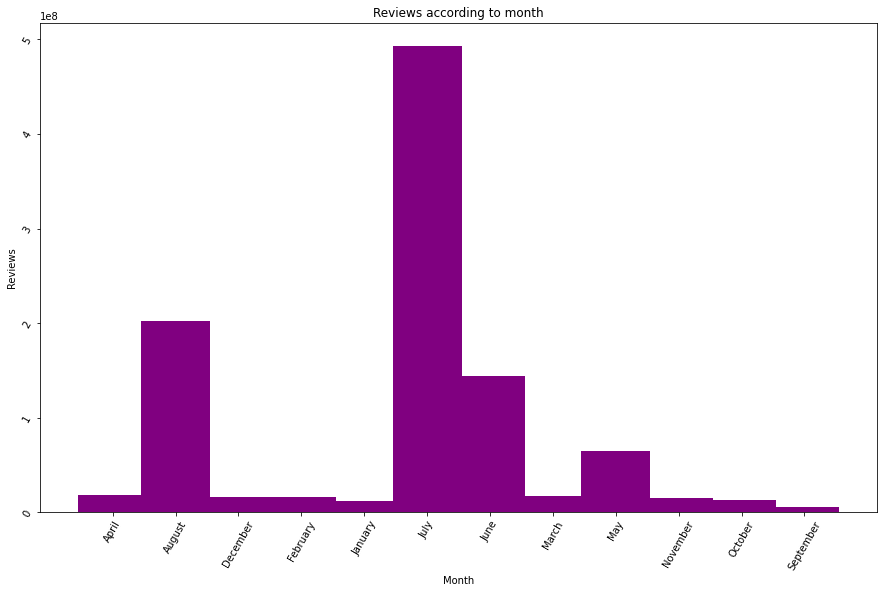

In [98]:
plt.figure(figsize=(15,9))
plt.bar(Highest_Review_Month_df.Month, Highest_Review_Month_df.Reviews,color = 'purple' ,width=1.1, label=Highest_Review_Month_df.Month)
plt.xlabel("Month")
plt.ylabel("Reviews")
plt.tick_params(rotation=60)
plt.title("Reviews according to month");

# **Explore user_review dataframe:**

In [99]:
# Reading the User Reviews.csv file
file_path = '/content/drive/My Drive/dataset/User Reviews.csv'
User_Review_DataFrame=pd.read_csv(file_path)

In [100]:
User_Review_DataFrame.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [101]:
User_Review_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [102]:
def User_Review_info():
  temp_df=pd.DataFrame(index=User_Review_DataFrame.columns)
  temp_df["datatype"]=User_Review_DataFrame.dtypes
  temp_df["not null values"]=User_Review_DataFrame.count()
  temp_df["null value"]=User_Review_DataFrame.isnull().sum()
  temp_df["% of the null value"]=User_Review_DataFrame.isnull().mean().round(4)*100
  temp_df["unique count"]=User_Review_DataFrame.nunique()
  return temp_df
User_Review_info()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


In [103]:
# Finding the total no of NaN values in each column.
User_Review_DataFrame.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [104]:
# checking the NaN values in the translated rview column
User_Review_DataFrame[User_Review_DataFrame['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [105]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
User_Review_DataFrame[User_Review_DataFrame['Translated_Review'].isnull() & User_Review_DataFrame['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [106]:
# Deleting the rows containing NaN values
User_Review_DataFrame = User_Review_DataFrame.dropna()

In [107]:
# The shape of the updated df
User_Review_DataFrame.shape

(37427, 5)

In [108]:
# Inspecting the sentiment column
User_Review_DataFrame['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [109]:
Merged_PS_RA = pd.merge(Play_Store_DataFrame, User_Review_DataFrame, on='App', how = "inner")

In [110]:
def Merged_Details():
  temp = pd.DataFrame(index=Merged_PS_RA.columns)
  temp['data_type'] = Merged_PS_RA.dtypes
  temp["count of non null values"] = Merged_PS_RA.count()
  temp['NaN values'] = Merged_PS_RA.isnull().sum()
  temp['% NaN values'] =Merged_PS_RA.isnull().mean()
  temp['unique_count'] = Merged_PS_RA.nunique() 
  return temp
Merged_Details()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,24069,0,0.0,568
Category,object,24069,0,0.0,33
Rating,float64,24069,0,0.0,22
Reviews,int64,24069,0,0.0,561
Size,float64,24069,0,0.0,166
Installs,int64,24069,0,0.0,12
Type,object,24069,0,0.0,2
Price,float64,24069,0,0.0,9
Content Rating,object,24069,0,0.0,5
Genres,object,24069,0,0.0,64


In [111]:
Merged_PS_RA.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.171095,0.167534,0.022414,-0.003789,0.091657,0.072236
Reviews,0.171095,1.000000,0.430137,0.473094,-0.029231,-0.108272,-0.007885
Size,0.167534,0.430137,1.000000,0.213743,-0.019786,-0.159388,0.009185
Installs,0.022414,0.473094,0.213743,1.000000,-0.028292,-0.081625,-0.011639
Price,-0.003789,-0.029231,-0.019786,-0.028292,1.000000,0.028132,0.002581
Sentiment_Polarity,0.091657,-0.108272,-0.159388,-0.081625,0.028132,1.000000,0.264156
Sentiment_Subjectivity,0.072236,-0.007885,0.009185,-0.011639,0.002581,0.264156,1.000000


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

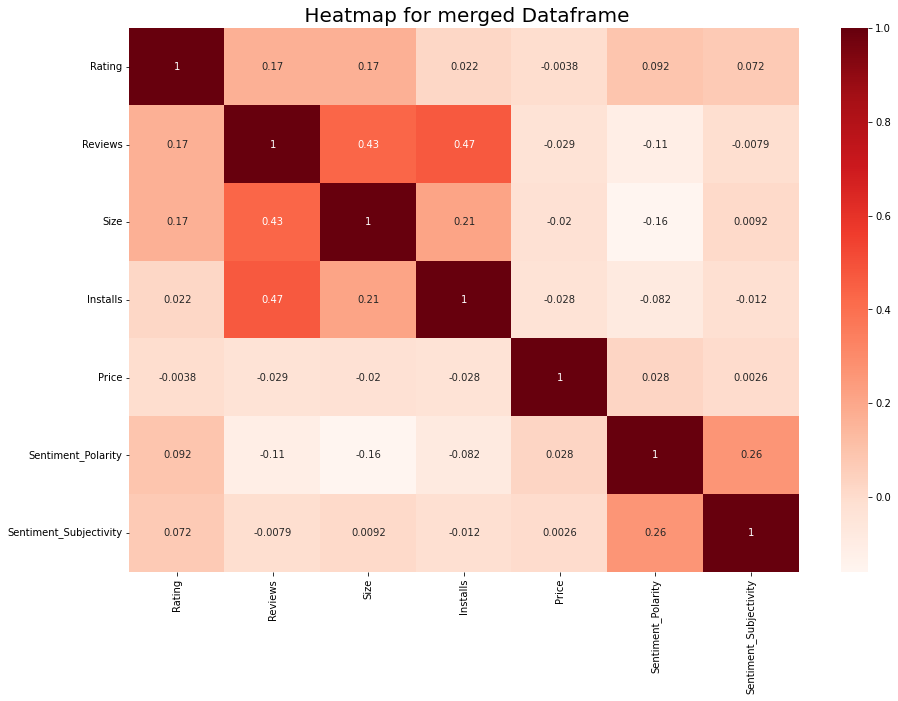

In [112]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(Merged_PS_RA.corr(), annot= True, cmap='Reds')
plt.title(' Heatmap for merged Dataframe', size=20)

In [113]:
Merged_PS_RA = Merged_PS_RA.dropna(subset=['Sentiment', 'Translated_Review'])

In [114]:
Merged_PS_RA.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,size_interval,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,0-25,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,0-25,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,0-25,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,0-25,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,0-25,I hate,Negative,-0.800,0.900000
